In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.info()     # info() tell us about how much entries, how much columns, etc.

# customerID DType is object because it is Alpha-Numeric. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Replacing blank space with 0 as tenure is 0 and no total charges are recorded.

In [8]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0")        # Replacing blank value with 0 in TotalCharges column
df["TotalCharges"] = df["TotalCharges"].astype("float")          # changing datatype from object to float64

In [9]:
df.info()                              # To see details information about columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
df.isnull().sum()    # It show how manmy Null values present in each columns
df.isnull().sum().sum()

np.int64(0)

In [14]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [17]:
df.duplicated().sum()       # It show how many duplicates records present in a DataFrame 

np.int64(0)

In [20]:
df["customerID"].duplicated().sum()      # Checking duplicates in customerID column

np.int64(0)

# Converted 0 and 1 values of Senior citizen to yes/no to make it easier to understand.

In [22]:
def conv(value):              # Using function to update 0 and 1 with 'no' and  'yes'
    if value == 1:
        return "yes"
    else:
        return "no"

df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)       

In [23]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


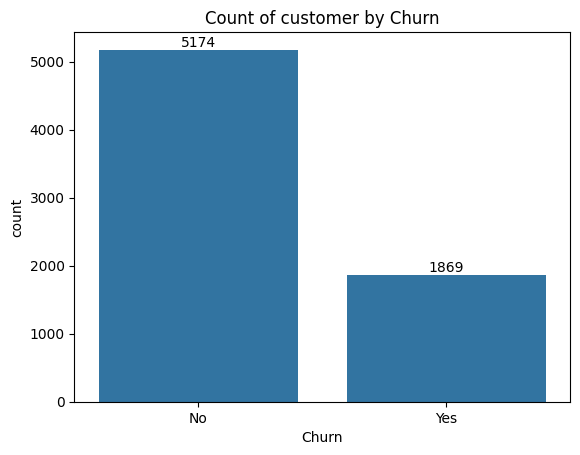

In [15]:
ax = sns.countplot(x = 'Churn', data = df)

ax.bar_label(ax.containers[0])

plt.title("Count of customer by Churn")
plt.show()

In [9]:
# Apply Group By on 'Churn' column with aggregate function of Count
gb = df.groupby("Churn").agg({'Churn':"count"})     
gb


,Churn
Churn,
No,5174
Yes,1869


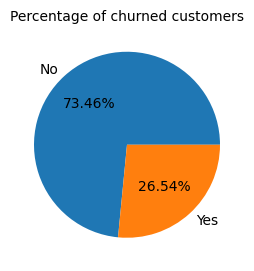

In [17]:
plt.figure(figsize = (3,4))
gb = df.groupby("Churn").agg({'Churn':"count"})     
gb
plt.pie(gb["Churn"], labels= gb.index, autopct='%.2f%%')

plt.title("Percentage of churned customers", fontsize=10)
plt.show()

In [18]:
# From the given pie chart we can conclude that 26.54% of our customers have churned out.
# now let's explore the reason behind it.

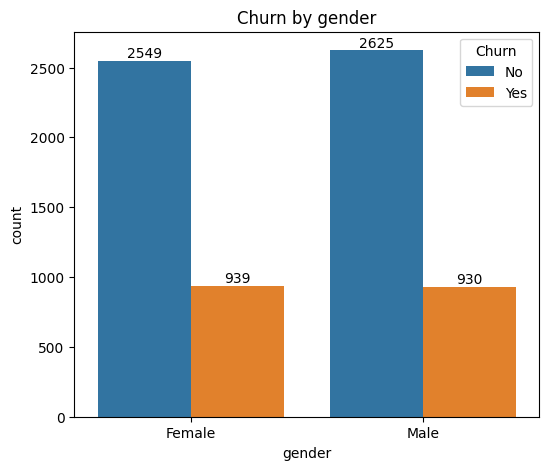

In [8]:
plt.figure(figsize = (6,5))
ax = sns.countplot(x = "gender", data = df, hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

total_male_cust = df['']
plt.title("Churn by gender")
plt.show()

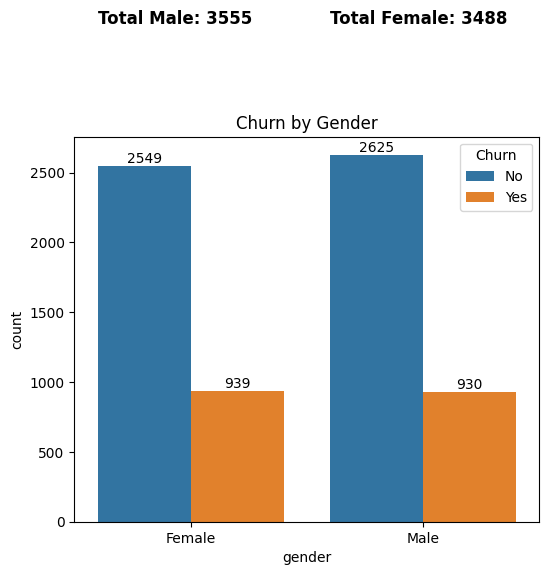

In [21]:
plt.figure(figsize = (6,5))
ax = sns.countplot(x = "gender", data = df, hue = "Churn" )

# Adding labels to bars
for container in ax.containers:
    ax.bar_label(container)

# Calculate total male and female customers
total_male = (df["gender"] == "Male").sum()
total_female = (df["gender"] == "Female").sum()

# Display totals as text on the chart
plt.text(-0.4, max(total_male, total_female), f"Total Male: {total_male}", fontsize=12, fontweight="bold")
plt.text(0.6, max(total_male, total_female), f"Total Female: {total_female}", fontsize=12, fontweight="bold")

plt.title("Churn by Gender")
plt.show()

C:\Users\aanuj\AppData\Local\Temp\ipykernel_8432\3621558179.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["No", "Yes"])


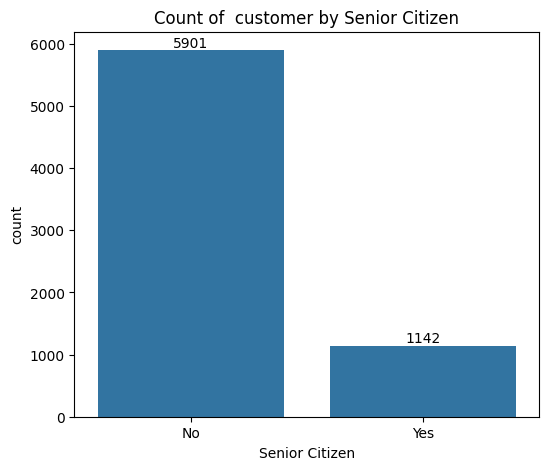

In [23]:
plt.figure(figsize = (6,5))

ax = sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])

# Change x-axis labels: 0 → "No", 1 → "Yes"
ax.set_xticklabels(["No", "Yes"])

plt.title("Count of  customer by Senior Citizen")
plt.xlabel("Senior Citizen")  # Ensure the x-label is clear
plt.show()  

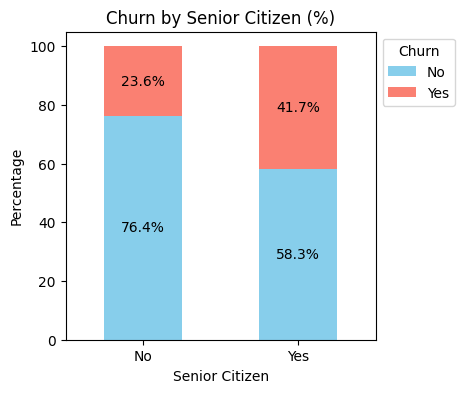

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming df is your DataFrame
# Create a cross-tabulation of SeniorCitizen and Churn with percentages
cross_tab = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100

# Plot the stacked bar chart
ax = cross_tab.plot(kind='bar', stacked=True, figsize=(4, 4), color=['skyblue', 'salmon'])

# Add percentage labels to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

# Customize the plot
plt.title('Churn by Senior Citizen (%)')
plt.xlabel('Senior Citizen')
plt.ylabel('Percentage')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)  # Assuming 0 = No, 1 = Yes for SeniorCitizen
plt.legend(title='Churn', bbox_to_anchor = (1.0, 1.0))      # Customize legend location
plt.show()



In [37]:
# Comparative a greater percentage of people in senior citizen have churned out.

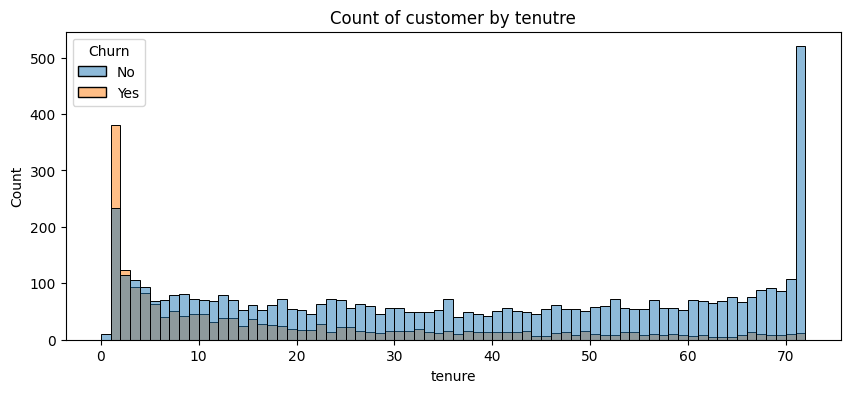

In [27]:
plt.figure(figsize = (10,4))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn")

plt.title("Count of customer by tenutre")
plt.show()

In [39]:
# The median Monthly Charges for customers who churned (Churn = "Yes") is significantly higher than for those who did not churn (Churn = "No").  this suggests that customers with higher monthly charges are more likely to churn.

##Percentage Analysis:
# If we assume that 30% of the dataset represents churned customers (Churn = "Yes"), and the median monthly charge for this group is $80, 
#  this highlights that a significant portion of high-paying customers are leaving.

# Conversely, the 70% of customers who did not churn (Churn = "No") have a lower median monthly charge of $60, suggesting that customers with 
#  lower charges are more likely to stay.

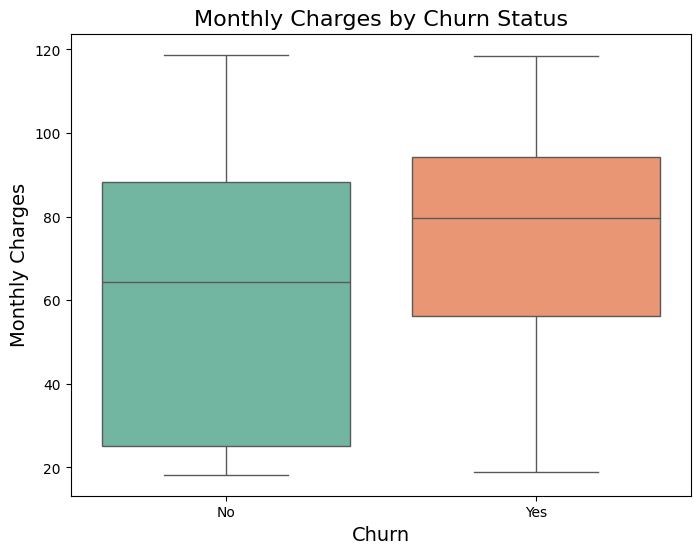

In [38]:

# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='Set2', hue="Churn")

# Add titles and labels
plt.title('Monthly Charges by Churn Status', fontsize=16)
plt.xlabel('Churn', fontsize=14)
plt.ylabel('Monthly Charges', fontsize=14)

# Show the plot
plt.savefig('MonthlyChargesBoxplot.jpg', dpi=400)
plt.show()

In [47]:
# People who have used our services for a long time have stayed and people who have used our services for 1 or 2 month have churned.

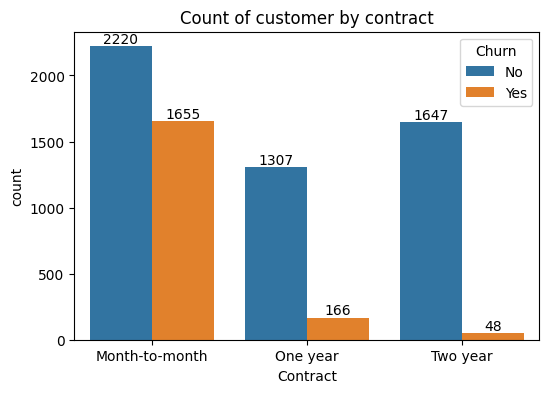

In [26]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = "Contract", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.title("Count of customer by MonthlyCharges")
plt.show()

In [52]:
# People who have month-to-month contract are likely to churn then from those who have 1 or 2 years of contract.

In [55]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

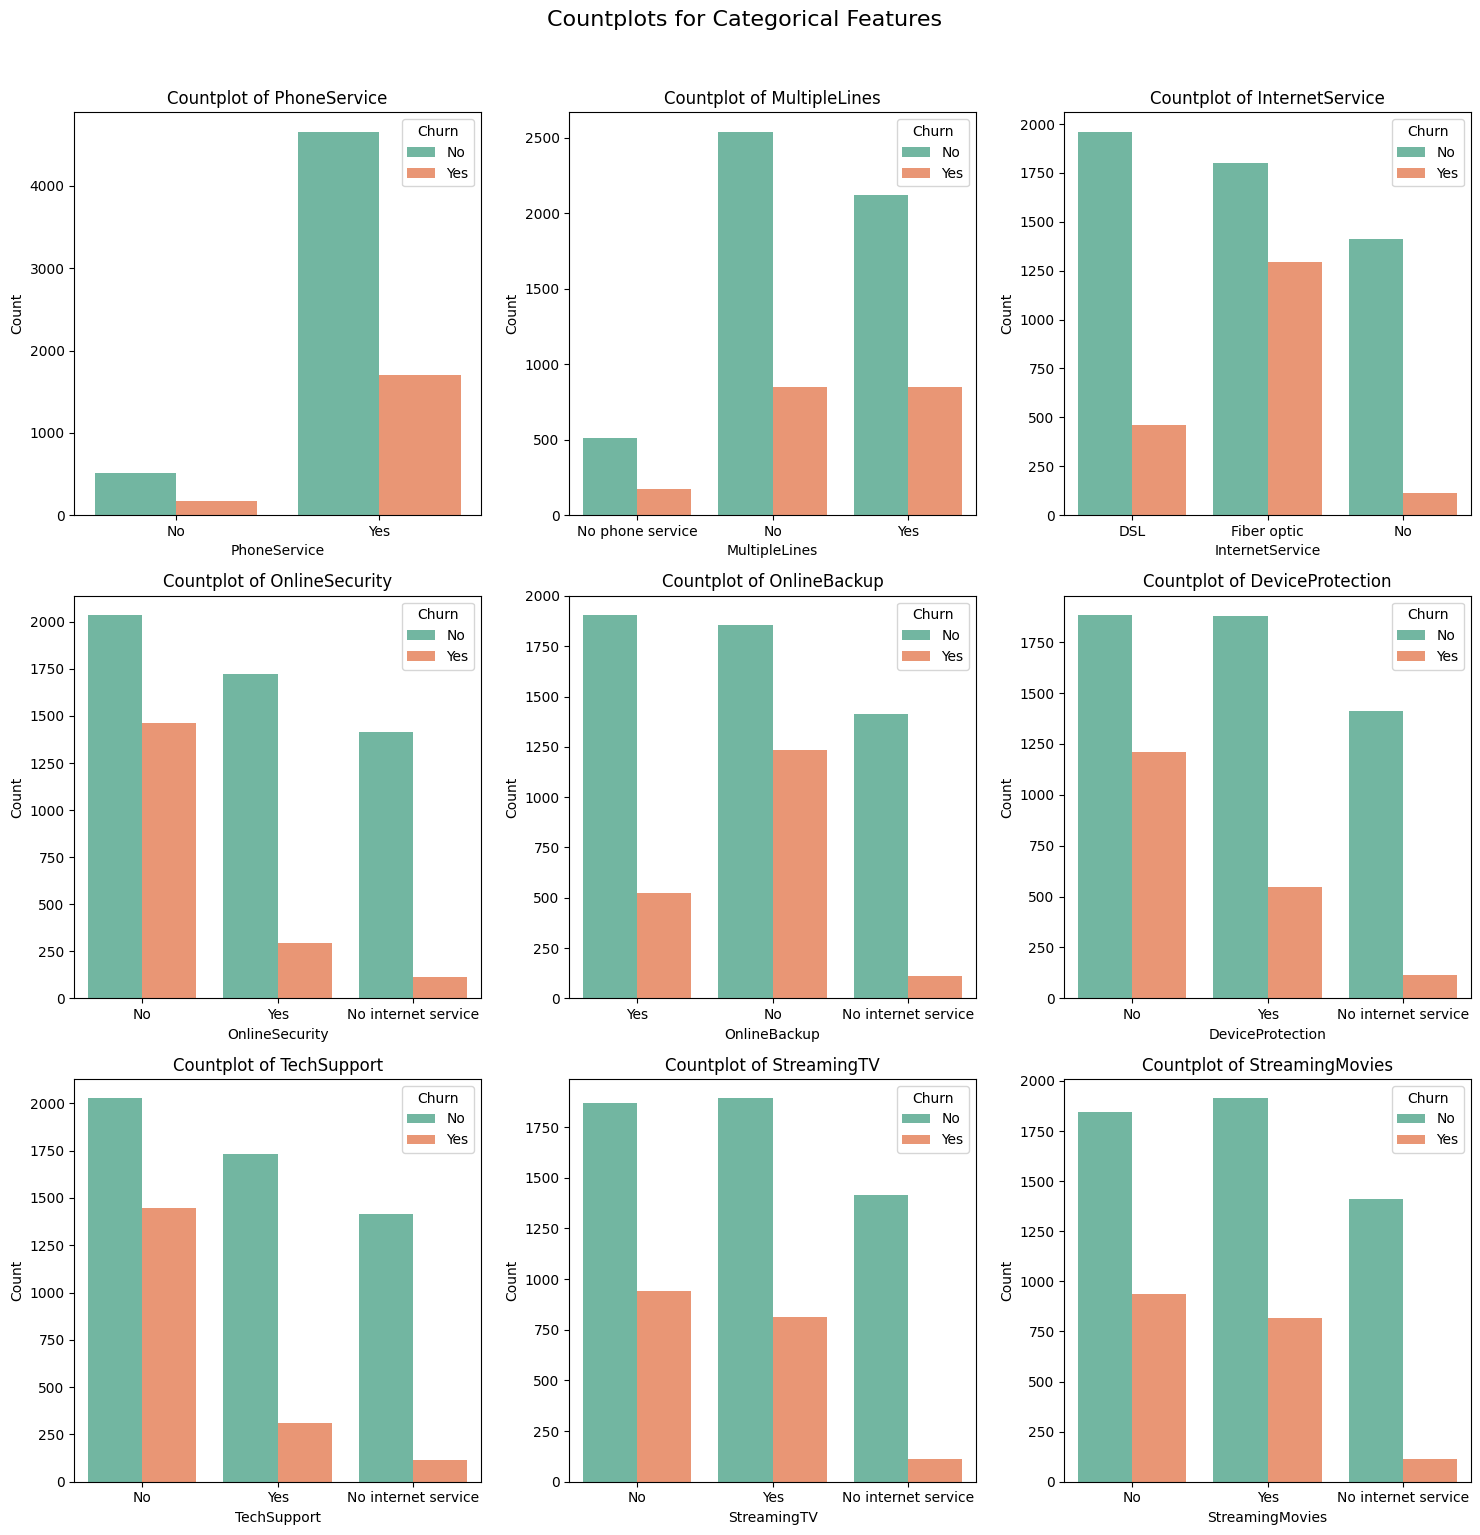

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to plot
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create a subplot grid
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))  # 3x3 grid
fig.suptitle('Countplots for Categorical Features', fontsize=16, y=1.02)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each column and create a countplot
for i, column in enumerate(columns):
    sns.countplot(x=column, data=df, ax=axes[i], hue="Churn", palette='Set2', legend=True)
    axes[i].set_title(f'Countplot of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=0)  # Rotate x-axis labels for better readability

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig('CategoricalFeature11.jpg', dpi=400)
plt.show()

In [65]:
# The visualizations show categorical feature distributions related to customer churn. In most categories, customers without additional services (like OnlineSecurity, TechSupport, and StreamingTV) tend to churn more frequently. 
# Fiber optic internet users also show a higher churn rate compared to DSL users. 
# Overall, customers with fewer services or protections appear more likely to leave.


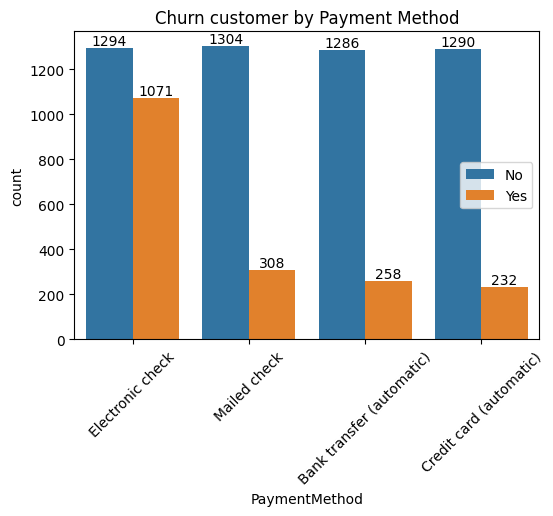

In [3]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.xticks(rotation = 45)
plt.legend()
plt.title("Churn customer by Payment Method")
plt.show()

In [18]:
# custyomer is likely to churn when he is using electronics check as a payment method.